# Carbon Dioxide Emissions Data wrangling<a id='Data_wrangling'></a>

## Contents<a id='Contents'></a>
  * [Introduction](#Introduction)
  
  * [Import Libraries and Load Data](#Imports)
  
  * [Objectives](#Objectives)
  
  * [Explore The Data](#Explore_The_Data)
  
  * [Clean The Data](#Clean_Data)
  
  * [Save data](#Save_data)
  
  * [Summary](#Summary)

## Introduction<a id='#Introduction'></a>

Carbon dioxide (CO2) is an important heat-trapping (greenhouse) gas, which is released through human activities such as deforestation and burning fossil fuels, as well as natural processes such as respiration and volcanic eruptions. Since the beginning of the industrial era (1750), human activities have raised atmospheric concentrations of CO2 by about 50%. This has led to an increase in global temperature. The accumulation of greenhouse gases in the atmosphere is one of the main causes of global warming. Transport, and cars in particular, is one of the main sources of greenhouse gas emissions. It is important to know the carbon footprint of vehicles to reduce its impact on the environment. A model will be developed to predict the CO2 emissions by vehicles based on the relevant data presented in the dataset.
This dataset captures the details of how CO2 emissions by a vehicle can vary with the different car features such as the Model, Transmission, Fuel Type, Engine Size(L), Fuel Consumption and CO2 emissions.


## Import Libraries and Load Data<a id='#Imports'></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import random
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LinearRegression 

In [7]:
#the supplied CSV data file is the raw_data directory
data=pd.read_csv('/Users/sidrakamal/Desktop/archive/CO2 Emissions_Canada.csv')

## Objectives<a id='#Objectives'></a>

In this notebook, my most important goals are to take the raw carbon dioxide emissions data and perform data cleaning process in order to make the data exploration and analysis easier further in the process. Most importantly, it is necessary to understand the features/target variables and see what value they bring to the dataset.

What is the shape of the data in terms of rows and columns?
Are there any particularly useful/useless features?
Are there any fundamental issues with the data?
Has the target feature been identified?


## Explore The Data<a id='#Explore The Data'></a>

In [8]:
#Call the info method on C02_data to see a summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [9]:
data.shape

(7385, 12)

In [10]:
#Call the head method on C02_data to print the first several rows of the data
data.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
#removing the Fuel Consumption Comb column because it is not needed
data.drop(columns='Fuel Consumption Comb (mpg)',inplace=True)
data.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


In [35]:
# Create a dictionary which will remap the values and replace the abbreviation in Fuel Type

dict = {'Z' : 'Premium gasoline', 'D' : 'Diesel', 'E' : 'Ethanol', 'N' : 'Natural gas','X': 'Regular gasoline'};
  
# Print the dictionary
print(dict)
  
# Remap the values of the dataframe
data=data.replace({"Fuel Type": dict})
data.head(5)


{'Z': 'Premium gasoline', 'D': 'Diesel', 'E': 'Ethanol', 'N': 'Natural gas', 'X': 'Regular gasoline'}


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Transmission_Type,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Automatic,PREMIUM GASOLINE,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Manual,PREMIUM GASOLINE,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Automatic,PREMIUM GASOLINE,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Automatic,PREMIUM GASOLINE,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Automatic,PREMIUM GASOLINE,12.1,8.7,10.6,244


In [13]:
s=data['Transmission'].value_counts().sort_values(ascending=False)
s

AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: Transmission, dtype: int64

In [23]:
#function for converting the different transmission types to either automatic or manual
def transmission(row):
    x=''
    if row.startswith('A'):
        x='Automatic'
    else:
        x='Manual'
    return x    

In [24]:
#applying the function to the transmission column
data['Transmission'].apply(transmission)

0       Automatic
1          Manual
2       Automatic
3       Automatic
4       Automatic
          ...    
7380    Automatic
7381    Automatic
7382    Automatic
7383    Automatic
7384    Automatic
Name: Transmission, Length: 7385, dtype: object

In [25]:
#renaming the column
data['Transmission_Type']=data['Transmission'].apply(transmission)

In [26]:
#checking the column names in the dataframe
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Transmission_Type', 'Fuel Type',
       'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [27]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#C02_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns = ['count', '%']
missing.sort_values(by='count')

,count,%
Make,0,0.0
Model,0,0.0
Vehicle Class,0,0.0
Engine Size(L),0,0.0
Cylinders,0,0.0
Transmission,0,0.0
Transmission_Type,0,0.0
Fuel Type,0,0.0
Fuel Consumption City (L/100 km),0,0.0
Fuel Consumption Hwy (L/100 km),0,0.0


In [28]:
# shift column 'Name' to first position
column_ = data.pop('Transmission_Type')
  
# insert column using insert(position,column_name,
# first_column) function
data.insert(6, 'Transmission_Type', column_)
data.head(1)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Transmission_Type,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Automatic,PREMIUM GASOLINE,9.9,6.7,8.5,196


In [29]:
#number of unique data values in each column
data.nunique()

Make                                  42
Model                               1596
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Transmission_Type                      2
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
CO2 Emissions(g/km)                  331
dtype: int64

In [30]:
#Categorical data
types=data.select_dtypes(include='object')
types

,Make,Model,Vehicle Class,Transmission,Transmission_Type,Fuel Type
0,ACURA,ILX,COMPACT,AS5,Automatic,PREMIUM GASOLINE
1,ACURA,ILX,COMPACT,M6,Manual,PREMIUM GASOLINE
2,ACURA,ILX HYBRID,COMPACT,AV7,Automatic,PREMIUM GASOLINE
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Automatic,PREMIUM GASOLINE
4,ACURA,RDX AWD,SUV - SMALL,AS6,Automatic,PREMIUM GASOLINE
...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Automatic,PREMIUM GASOLINE
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Automatic,PREMIUM GASOLINE
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Automatic,PREMIUM GASOLINE
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Automatic,PREMIUM GASOLINE


In [32]:
#Generate descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [36]:
#Make all the string data upper case so as to remove the duplicates
data['Make'] = data['Make'].str.upper()
data['Model'] = data['Model'].str.upper()
data['Vehicle Class'] = data['Vehicle Class'].str.upper()
data['Transmission'] = data['Transmission'].str.upper()
data['Fuel Type']=data['Fuel Type'].str.upper()
data.tail(5)


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Transmission_Type,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Automatic,PREMIUM GASOLINE,10.7,7.7,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Automatic,PREMIUM GASOLINE,11.2,8.3,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Automatic,PREMIUM GASOLINE,11.7,8.6,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Automatic,PREMIUM GASOLINE,11.2,8.3,9.9,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Automatic,PREMIUM GASOLINE,12.2,8.7,10.7,248


## Clean The Data<a id='#Clean The Data'></a>

In [37]:
#To check for the duplicated rows in the dataframe
duplicate=data.duplicated().sum()
duplicate

1394

In [38]:
#removing the duplicate values from the dataframe
df=data.drop_duplicates()
#finding out the rows and columns after the removal of the duplicates
df.shape

(5991, 12)

In [39]:
#Generate descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),5991.0,3.173043,1.365751,0.9,2.0,3.0,3.8,8.4
Cylinders,5991.0,5.633784,1.851161,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),5991.0,12.650075,3.560977,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),5991.0,9.091320,2.293336,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),5991.0,11.049224,2.957762,4.1,8.9,10.6,12.7,26.1
CO2 Emissions(g/km),5991.0,251.638124,59.246929,96.0,208.0,246.0,290.0,522.0


#### From this table we can see that an average car consumes more fuel in the City than in the Highway!

In [40]:
df['Make'].value_counts(normalize=True)

FORD             0.093974
CHEVROLET        0.083959
BMW              0.082123
MERCEDES-BENZ    0.060591
GMC              0.046403
AUDI             0.043899
PORSCHE          0.042898
TOYOTA           0.042063
NISSAN           0.032048
JEEP             0.031380
MINI             0.031213
KIA              0.030379
VOLKSWAGEN       0.030045
HYUNDAI          0.028710
DODGE            0.025204
HONDA            0.024036
CADILLAC         0.023535
LEXUS            0.021532
MAZDA            0.020865
VOLVO            0.019696
SUBARU           0.018695
JAGUAR           0.017026
BUICK            0.015189
INFINITI         0.014355
LINCOLN          0.013020
LAND ROVER       0.012185
RAM              0.011851
MITSUBISHI       0.011851
CHRYSLER         0.010349
FIAT             0.009014
ACURA            0.008179
MASERATI         0.008179
ROLLS-ROYCE      0.007344
ASTON MARTIN     0.006510
LAMBORGHINI      0.006176
BENTLEY          0.005842
SCION            0.003505
GENESIS          0.002337
ALFA ROMEO  

In [41]:
df['Make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [42]:
df['Model'].value_counts().sort_values(ascending=False).head(10)

MUSTANG          33
F-150 FFV        32
F-150 FFV 4X4    31
SIERRA 4WD       27
SILVERADO 4WD    26
FOCUS FFV        24
SIERRA           24
SILVERADO        24
CAMARO           22
COROLLA          21
Name: Model, dtype: int64

In [43]:
df['Vehicle Class'].value_counts().sort_values(ascending=False).head()

SUV - SMALL       961
MID-SIZE          931
COMPACT           888
SUV - STANDARD    590
SUBCOMPACT        517
Name: Vehicle Class, dtype: int64

In [44]:
df['Engine Size(L)'].value_counts().sort_values(ascending=False).head()


2.0    1212
3.0     641
3.5     409
3.6     403
2.5     338
Name: Engine Size(L), dtype: int64

In [45]:
df['Cylinders'].value_counts().sort_values(ascending=False).head()

4     2612
6     1931
8     1170
12     131
3       80
Name: Cylinders, dtype: int64

In [46]:
df['Transmission'].value_counts().sort_values(ascending=False)

AS6     1103
AS8     1019
M6       724
A6       671
AM7      357
A8       350
AS7      278
A9       250
AV       224
M5       165
AS10     149
AM6       97
AV6       83
AV7       83
A5        72
M7        66
AS9       60
A4        58
AM8       42
A7        42
AV8       33
A10       25
AS5       24
AV10       9
AM5        4
AS4        2
AM9        1
Name: Transmission, dtype: int64

In [47]:
df['Fuel Type'].value_counts().sort_values(ascending=False).head()

REGULAR GASOLINE    2878
PREMIUM GASOLINE    2641
ETHANOL              325
DIESEL               146
NATURAL GAS            1
Name: Fuel Type, dtype: int64

In [48]:
df['Make'].value_counts().sort_values(ascending=False).head()

FORD             563
CHEVROLET        503
BMW              492
MERCEDES-BENZ    363
GMC              278
Name: Make, dtype: int64

In [49]:
df['Transmission_Type'].value_counts()

Automatic    5036
Manual        955
Name: Transmission_Type, dtype: int64

In [50]:
model=df['Make'].value_counts().sort_values(ascending=False).head(5)
model

FORD             563
CHEVROLET        503
BMW              492
MERCEDES-BENZ    363
GMC              278
Name: Make, dtype: int64

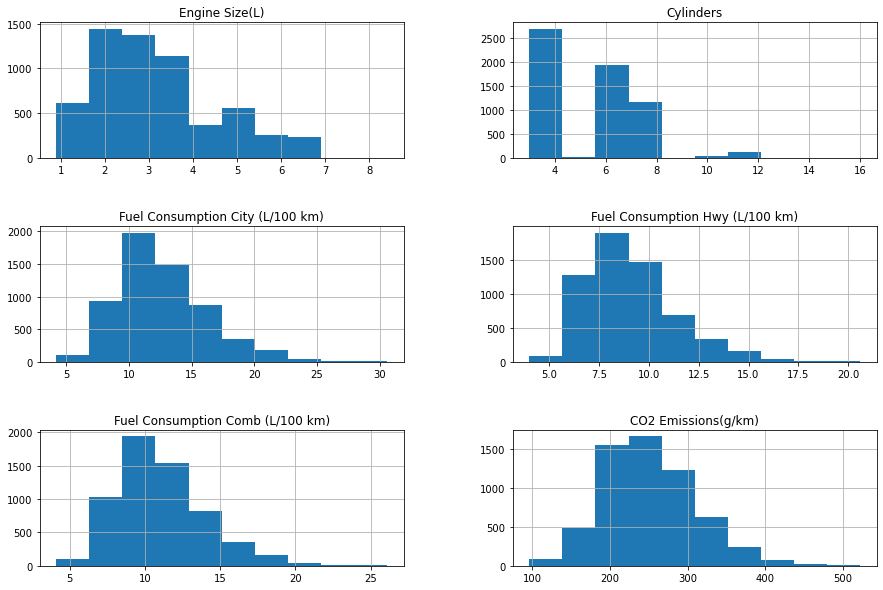

In [51]:
df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

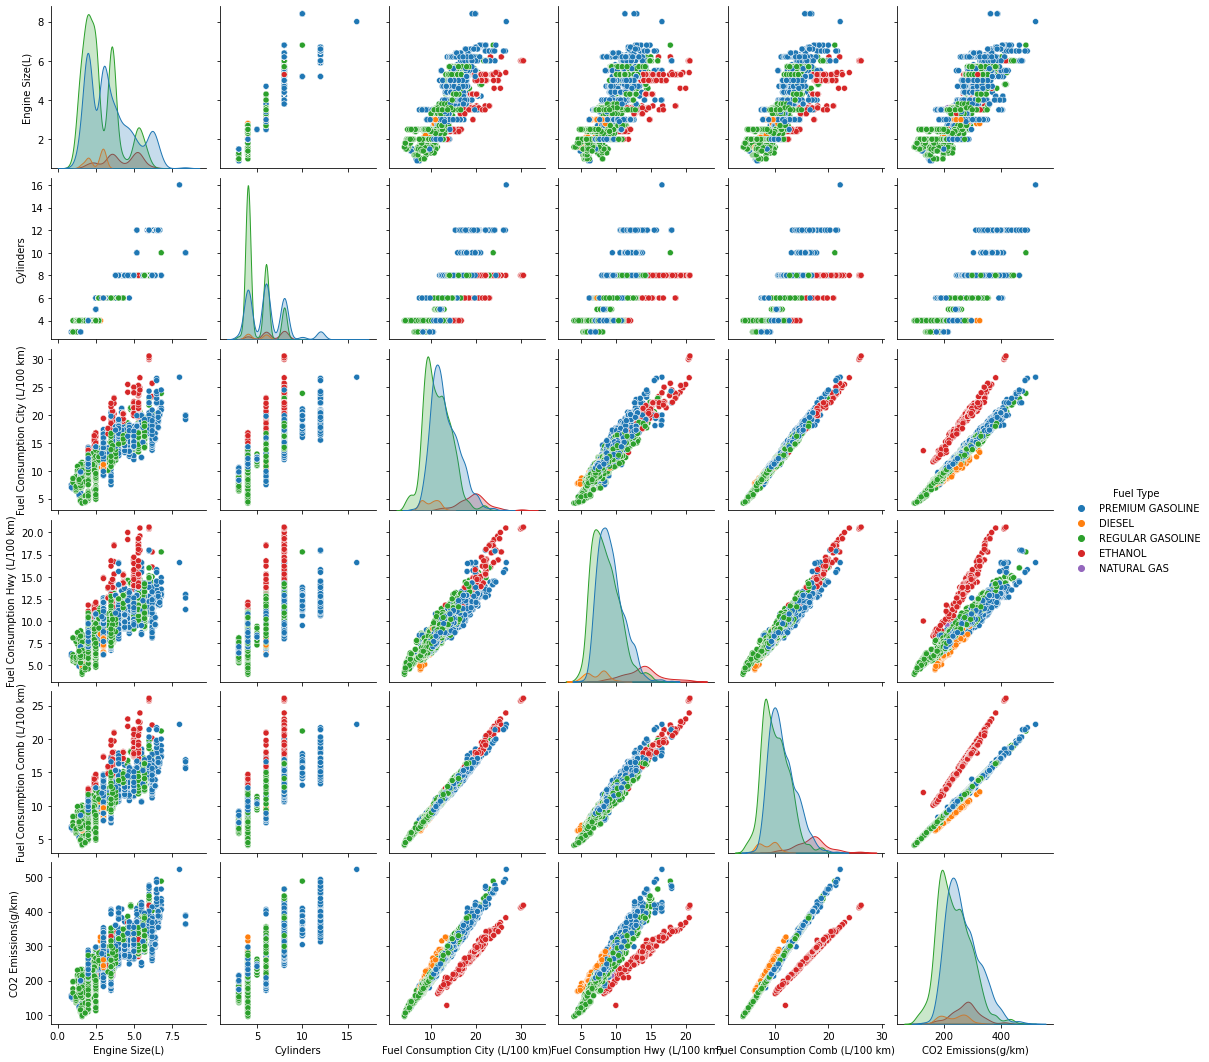

In [52]:
#pairplot to check the relation between two variables
sns.pairplot(df,hue='Fuel Type')

## Save Cleaned Data<a id='#Clean_data'></a>

In [63]:
df.to_csv('df_cleaned.csv')

## Summary

* Originally this dataset had 7385 rows and 12 columns but after the duplicate removal there are 5991 rows
* No null values in this dataset
* The dataset has been cleaned for further analysis